In [12]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Feed Data into SQL and load using DB

In [2]:
# Load the dataset
data = Path('./Resources/diamonds.csv')
df = pd.read_csv(data)

In [3]:
print("Dataset shape:", df.shape)
df.info()
df.head()

Dataset shape: (53940, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis

In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Print categorical values in the dataset
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
print(df.cut.value_counts())
print(df.color.value_counts())
print(df.clarity.value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


## Data Cleaning

In [7]:
# Dropping Zero values in the dataset
df = df.drop('Unnamed: 0', axis=1)

df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

df = df.drop(df[df['price'] == 0].index)

print(df.shape)

(53920, 10)


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Exploratory Data Analysis

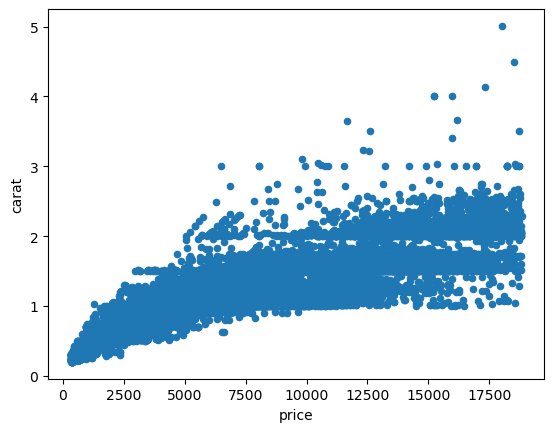

In [9]:
df.plot.scatter('price', 'carat')
plt.show()

In [10]:
def plot_box(data_):
    scaler = StandardScaler()
    out = scaler.fit_transform(data_)
    df_ = pd.DataFrame(out, columns=data_.columns)
    df_.plot.box()
    plt.show()

In [11]:
# df.boxplot()
plot_box(df.drop(columns=['cut', 'clarity', 'color']))
plt.show()

NameError: name 'StandardScaler' is not defined

In [ ]:
# Verifying the dataset has no null or N/A values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

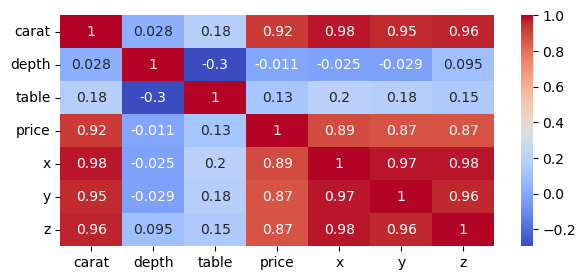

In [ ]:
corr = df.corr()
plt.figure(figsize = (7,3))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm' )

In [ ]:
## Observation: Carat and Price is very strongly correlation. x, y, z is strongly related to Price & depth is not strongly relation

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


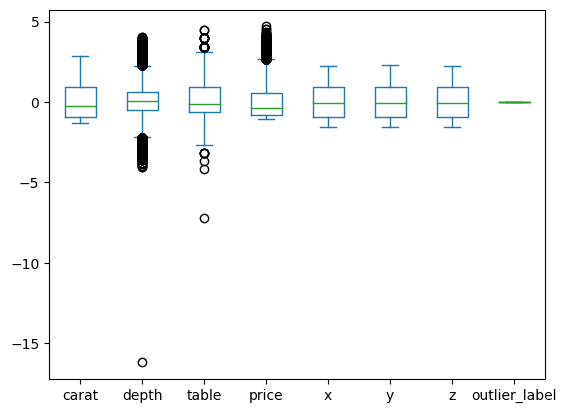

In [ ]:
plot_box(df.drop(columns=['color', 'cut', 'clarity']))

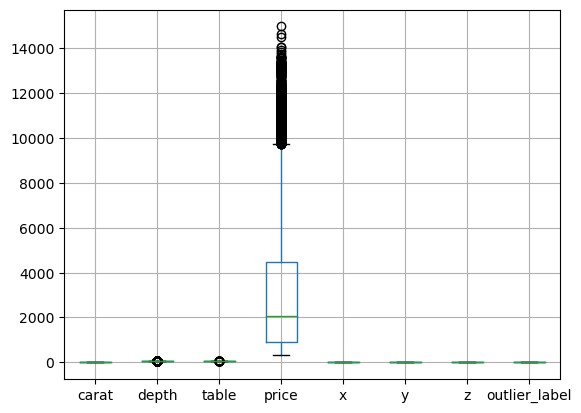

In [ ]:
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()

# df.boxplot()
# plt.show()

In [ ]:
## Drop Outliers from the Dataset
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes (include=np.number).columns.tolist()

outlier_detector = IsolationForest(contamination='auto', random_state=42)
df['outlier_label'] = outlier_detector.fit_predict(df[numeric_cols])

print(f'Outlier rows detected: {len(df['outlier_label'] == -1])}')

df = df[df['outlier_label'] != -1]

df_new = df.drop('outlier_label', axis = 1)

print(df_new)

       carat        cut color clarity  depth  table  price     x     y     z
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
13      0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
15      0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
16      0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[45219 rows x 10 columns]


In [ ]:
df_new.describe()

,carat,depth,table,price,x,y,z
count,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000,45219.000000
mean,0.696015,61.809735,57.225363,2996.291183,5.535787,5.540324,3.423045
std,0.335746,1.161851,1.967068,2550.023679,0.905908,0.901181,0.561952
min,0.260000,43.000000,43.000000,334.000000,4.120000,4.120000,2.540000
25%,0.390000,61.200000,56.000000,928.000000,4.690000,4.700000,2.890000
50%,0.610000,61.900000,57.000000,2086.000000,5.480000,5.490000,3.380000
75%,1.010000,62.500000,59.000000,4455.000000,6.380000,6.380000,3.950000
max,1.650000,66.500000,66.000000,14982.000000,7.580000,7.620000,4.680000


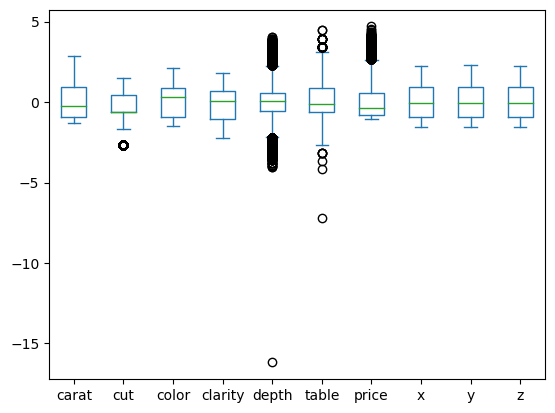

In [ ]:
#Box Plot after removing some outliers from the Dataset
# df_new.boxplot()
plot_box(df_new)
plt.show()

In [ ]:
# for col in df.columns:
#     if col in ('cut', 'color', 'clarity'):
#         continue
#     df[col] = df[col] / df[col].max()

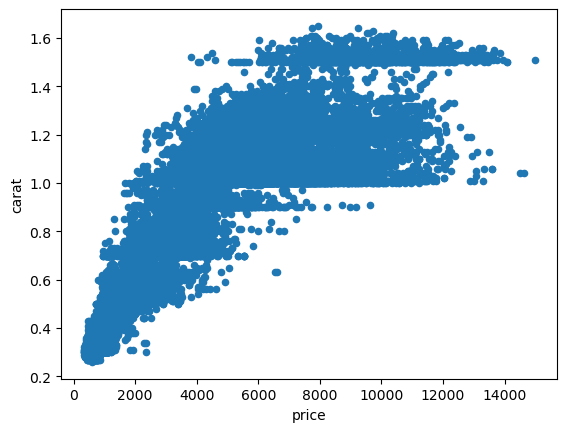

In [ ]:
df_new.plot.scatter('price', 'carat')
plt.show()

## One Label Encoding technique to represent categorical variables as numerical values in a ML model

In [ ]:
def convert_catg(df):
    
    le = LabelEncoder()
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))
        for i in object_cols_ind:
            df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
        

In [ ]:
convert_catg(df_new)
print(df_new.head())
len(df)

    carat  cut  color  clarity  depth  table  price     x     y     z
3    0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4    0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
13   0.31    2      6        3   62.2   54.0    344  4.35  4.37  2.71
15   0.32    3      1        0   60.9   58.0    345  4.38  4.42  2.68
16   0.30    2      5        3   62.0   54.0    348  4.31  4.34  2.68


45219

In [ ]:
# Separating target and independent variables 
y = df_new['price']
X = df_new.drop(columns=['price'])
X.head(), y.head()

(    carat  cut  color  clarity  depth  table     x     y     z
 3    0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
 4    0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
 13   0.31    2      6        3   62.2   54.0  4.35  4.37  2.71
 15   0.32    3      1        0   60.9   58.0  4.38  4.42  2.68
 16   0.30    2      5        3   62.0   54.0  4.31  4.34  2.68,
 3     334
 4     335
 13    344
 15    345
 16    348
 Name: price, dtype: int64)

## Training and Testing

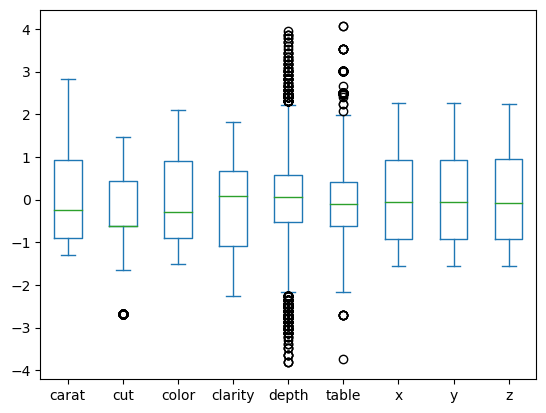

In [ ]:
plot_box(new_df2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size=0.8,random_state=42)

In [ ]:
assert len(X_train) + len(X_test) == len(df_new)
print(len(X_train), len(X_test), len(df_new))

assert len(y_train) + len(y_test) == len(df)
print(len(y_train), len(y_test), len(df))

36175 9044 45219
36175 9044 45219


Scalar testing only required for linear models. Doesn't make any difference for tree based methods.
Leaving it in, incase there are points for this step.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform (X_train)
X_test = scaler.transform (X_test)

#Feature Importances
#Based on Random Feature Importances, mathematically the most important variables that influence the price of a diamond are Carat (weight) & Clarity

# Random Forest Regressor

In [ ]:
def model_analysis(actuals, predicted):
    
    # fig, axes = plt.subplots(1, 3)
    rf_regressor = r2_score(actuals, predicted)*100
    mse = mean_squared_error(actuals, predicted)
    print ("The r2 value of Random forest Regressor is:", rf_regressor)
    print(f'The rmse of Random Forest Regressor is: {round(mse**.5, 2)}')

    new_pred_test = pd.DataFrame(actuals)
    new_pred_test['pred'] = predicted
    new_pred_test['error'] = new_pred_test['pred'] - new_pred_test['price']
    new_pred_test['error'].plot.kde()
    plt.xlim(-10000, 10000)
    plt.show()

    new_pred_test['error_pct'] = (new_pred_test['error'] / new_pred_test['price'] * 100).round(2)
    new_pred_test['error_pct'].plot.kde()
    plt.xlim(-150, 150)
    plt.show()
    
    pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True)).set_index(1).plot.bar()

The r2 value of Random forest Regressor is: 98.13847176643098
The rmse of Random Forest Regressor is: 348.96


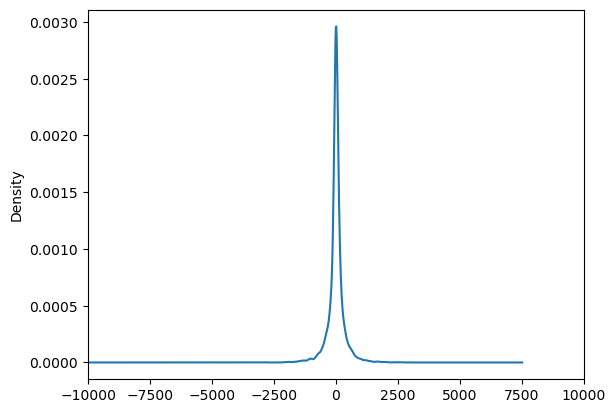

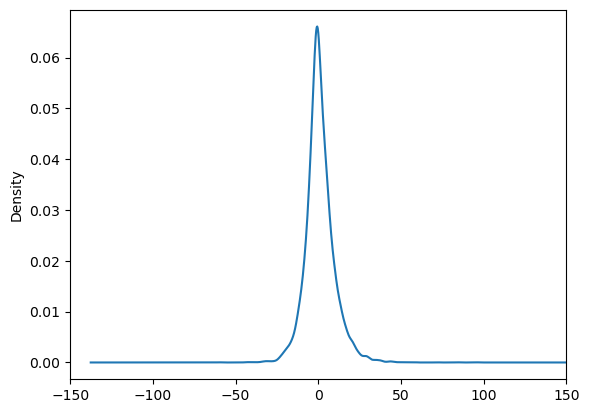

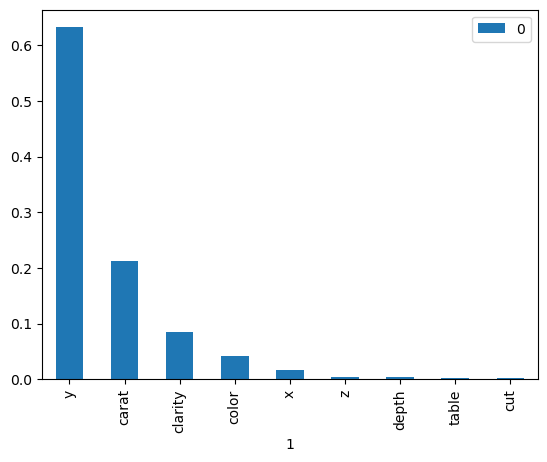

In [ ]:
rf = RandomForestRegressor(n_estimators=25, random_state=42)

rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

model_analysis(y_test, pred2)

## Seeing if we can improve upon model performance

The r2 value of Random forest Regressor is: 97.4935562938465
The rmse of Random Forest Regressor is: 404.92


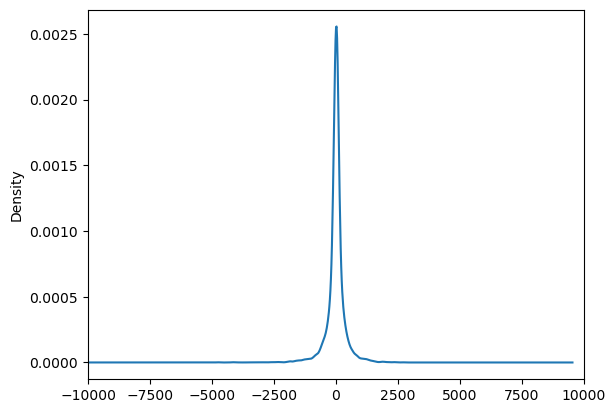

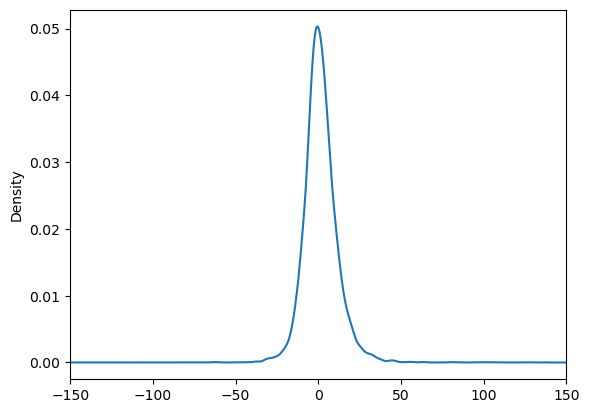

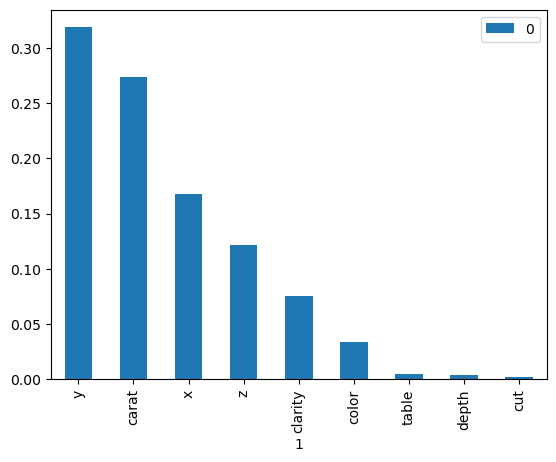

In [ ]:
rf = RandomForestRegressor(n_estimators=250, min_samples_leaf=5, random_state=42, max_features='sqrt')

rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

model_analysis(y_test, pred2)